In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def selectBest(data, jump):
    indexes = data.index
    for i in range(indexes[0], indexes[-1], jump):
        print(i)
        indice_inicial = i
        indice_final = i + jump - 1

        subconjunto = data.loc[indice_inicial:indice_final]
        indice_maximo = subconjunto['weighted_avg'].nlargest(1).index

        print(data.loc[indice_maximo, "Another_Info"])

In [4]:
df = pd.read_csv("final_results.csv")
df.loc[((df['Method'] == "Reweighing") & (df['Another_Info'] == "No Reweighing")), 'Method'] = "BaseRL"
# Imprimindo o dataset ordenado
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Adult")], 11) #=> 1
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "German")], 11) #=> 0.2
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Compas")], 11) #=> 0.8
df

,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
0,0.586821,0.127198,0.0,DisparactImpactRemover,Adult,0.650160
1,0.586708,0.112494,0.1,DisparactImpactRemover,Adult,0.670217
2,0.586573,0.106573,0.2,DisparactImpactRemover,Adult,0.678235
3,0.581455,0.085569,0.3,DisparactImpactRemover,Adult,0.703639
4,0.578514,0.072411,0.4,DisparactImpactRemover,Adult,0.719727
...,...,...,...,...,...,...
343,0.617341,0.084904,With Reweighing,Reweighing,Compas,0.728039
344,0.610304,0.231155,No Reweighing,BaseRL,Compas,0.523210
345,0.619112,0.091275,With Reweighing,Reweighing,Compas,0.720476
346,0.649891,0.189088,No Reweighing,BaseRL,Compas,0.606714


In [5]:
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Adult")], 3) #=> 25
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "German")], 3) #=> 0.1
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Compas")], 3) #=> 25

In [6]:
df = df.drop((df.loc[(df['Another_Info'] != "1.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.2") & (df["Data_Name"] =="German") & (df["Method"] =="DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.8") & (df["Data_Name"] =="Compas") & (df["Method"] =="DisparactImpactRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "best eta = 10 ") & (df["Data_Name"] =="Adult") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="German") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="Compas") & (df["Method"] == "Optimizer")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.1") & (df["Data_Name"] =="German") & (df["Method"] =="PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Compas") & (df["Method"] =="PrejudiceRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] == "Test No Change") & (df["Method"] == "RejectClass")]).index)

df['Another_Info'].value_counts() # OK

Test with Change    15
No Reweighing       15
With Reweighing     15
best eta = 0.01     10
25.0                10
1.0                  5
0.2                  5
0.8                  5
best eta = 10        5
0.1                  5
Name: Another_Info, dtype: int64

In [7]:
ordem_desejada = ["BaseRL", "Reweighing", "DisparactImpactRemover", "Optimizer", "PrejudiceRemover" , "RejectClass"]

# Ordenando o dataset de acordo com a coluna e a ordem desejada
df = df.sort_values(by="Method", key=lambda x: x.map(ordem_desejada.index))
df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
df['Method'].unique()

array(['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer',
       'PrejudiceRemover', 'RejectClass'], dtype=object)

<Figure size 640x480 with 0 Axes>

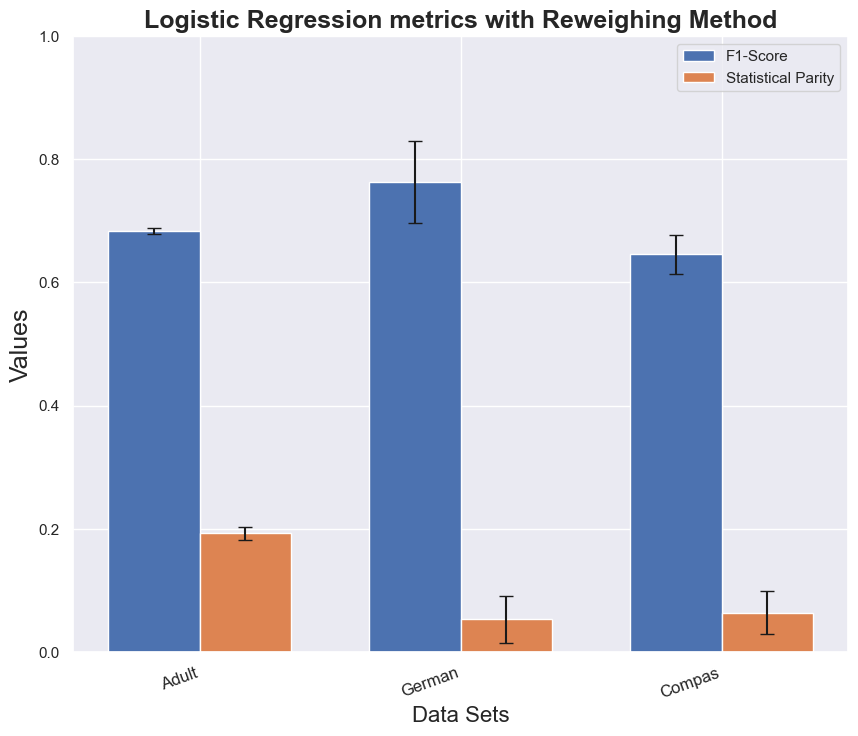

In [8]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "Reweighing"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Logistic Regression metrics with Reweighing Method', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//reweighing.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


<Figure size 640x480 with 0 Axes>

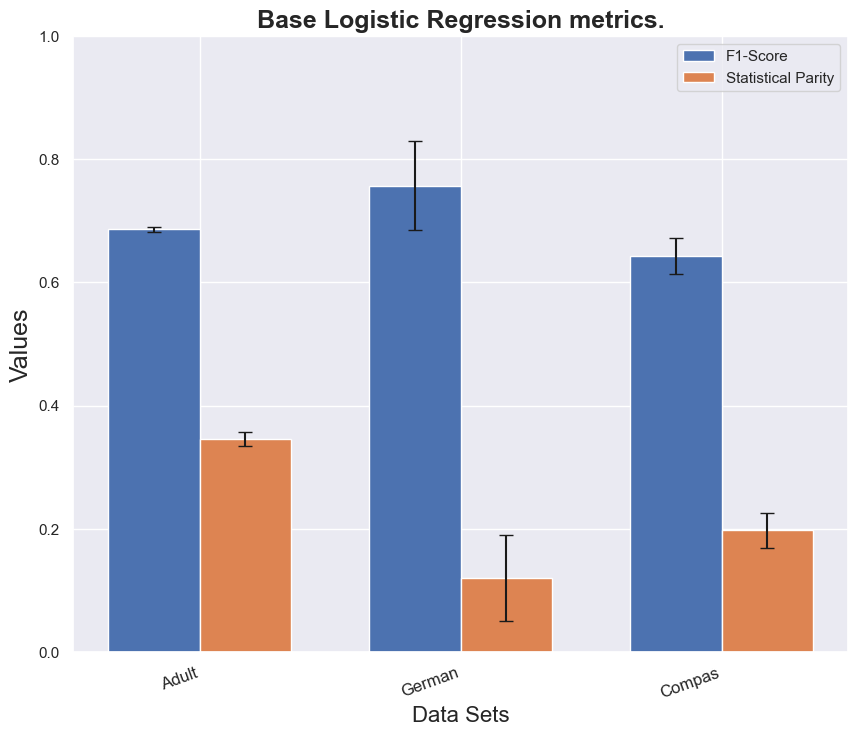

In [9]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "BaseRL"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Base Logistic Regression metrics.', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//base.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


<Figure size 640x480 with 0 Axes>

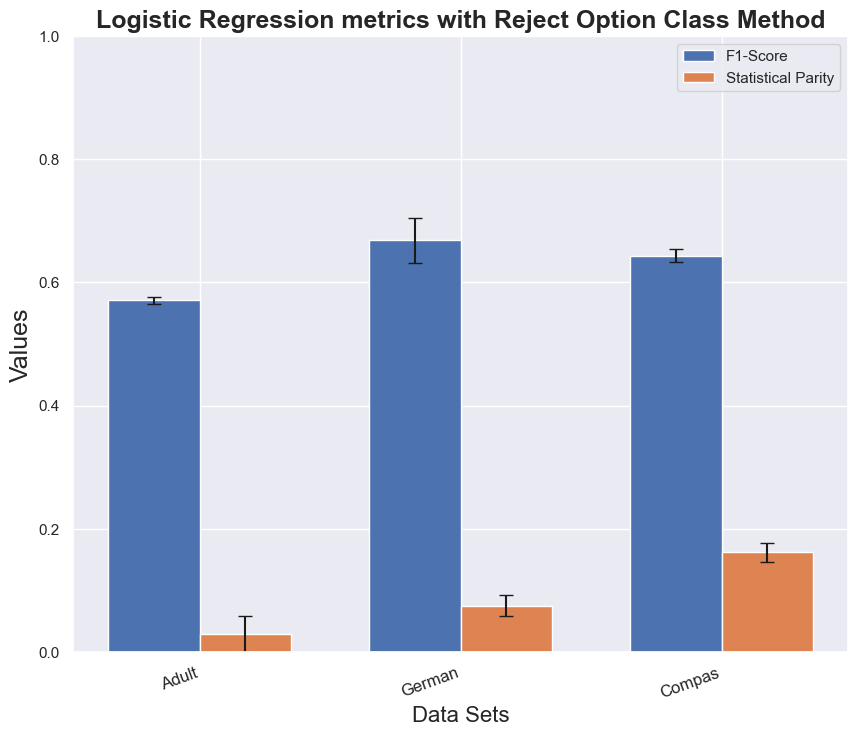

In [10]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "DisparactImpactRemover"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Logistic Regression metrics with Reject Option Class Method', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//rejectclass.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


<Figure size 640x480 with 0 Axes>

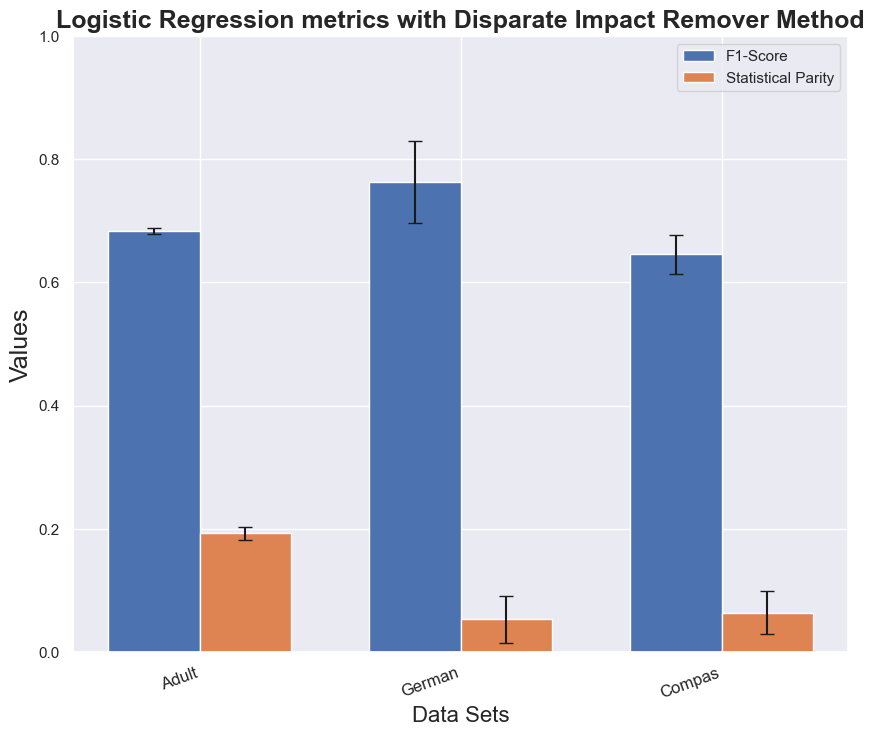

In [11]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "Reweighing"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Logistic Regression metrics with Disparate Impact Remover Method', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//disparate.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


<Figure size 640x480 with 0 Axes>

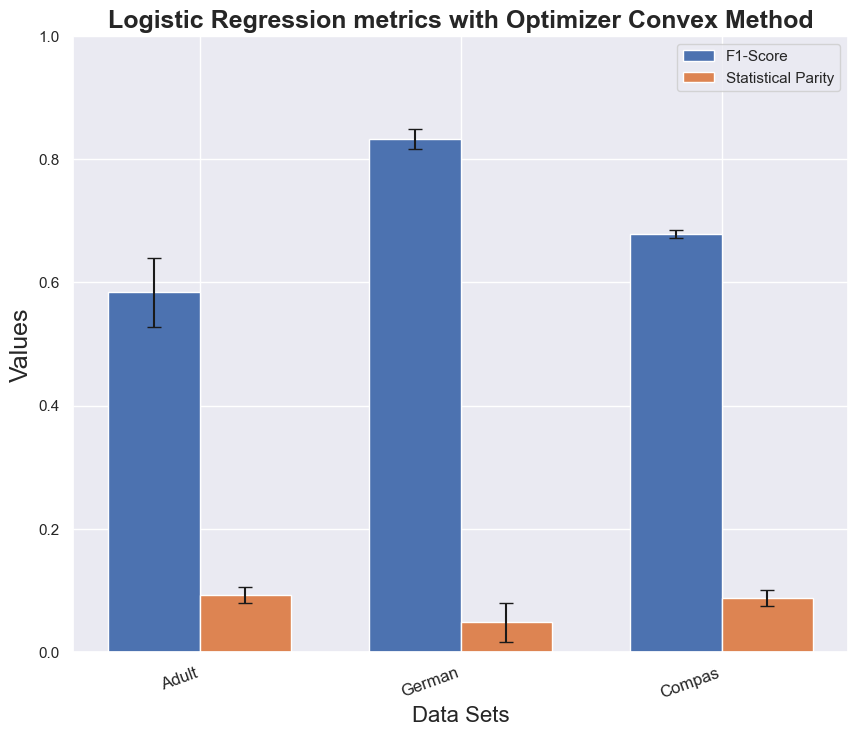

In [12]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "Optimizer"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Logistic Regression metrics with Optimizer Convex Method', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//optimizer.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


<Figure size 640x480 with 0 Axes>

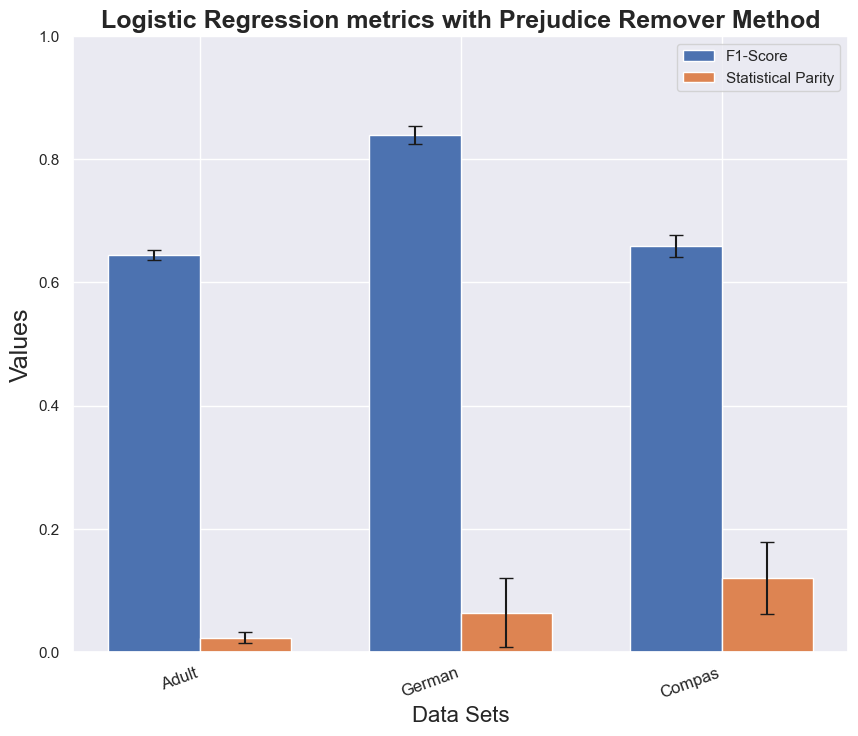

In [13]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "PrejudiceRemover"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))

barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right',fontsize = 12)
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 18 )
ax.set_title('Logistic Regression metrics with Prejudice Remover Method', fontsize = 18, fontweight = 'bold')
ax.set_ylim(0, 1)
# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//prejudice.png")

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


In [14]:
# print(df)

<Figure size 640x480 with 0 Axes>

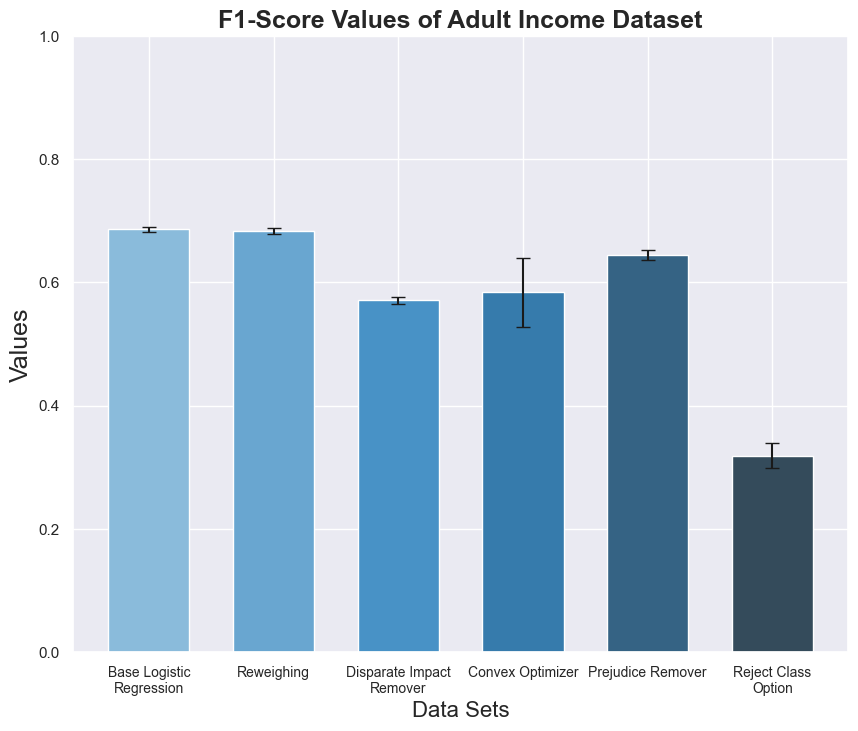

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"]  
df_method = df[df['Data_Name'] == "Adult"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['F1-Score'].std()) 

# Definir a largura das barras
largura_barra = 0.65

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color = cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('F1-Score Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 1)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//adultf1.png")


<Figure size 640x480 with 0 Axes>

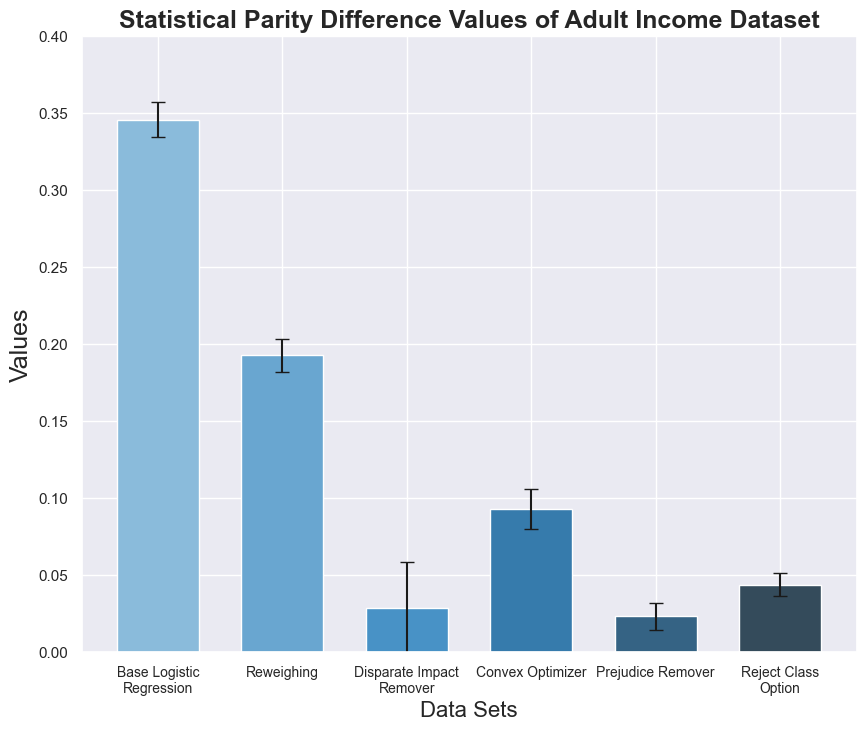

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"] 

df_method = df[df['Data_Name'] == "Adult"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].std()) 

# Definir a largura das barras
largura_barra = 0.66

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color=cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('Statistical Parity Difference Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 0.4)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//adultspd.png")


<Figure size 640x480 with 0 Axes>

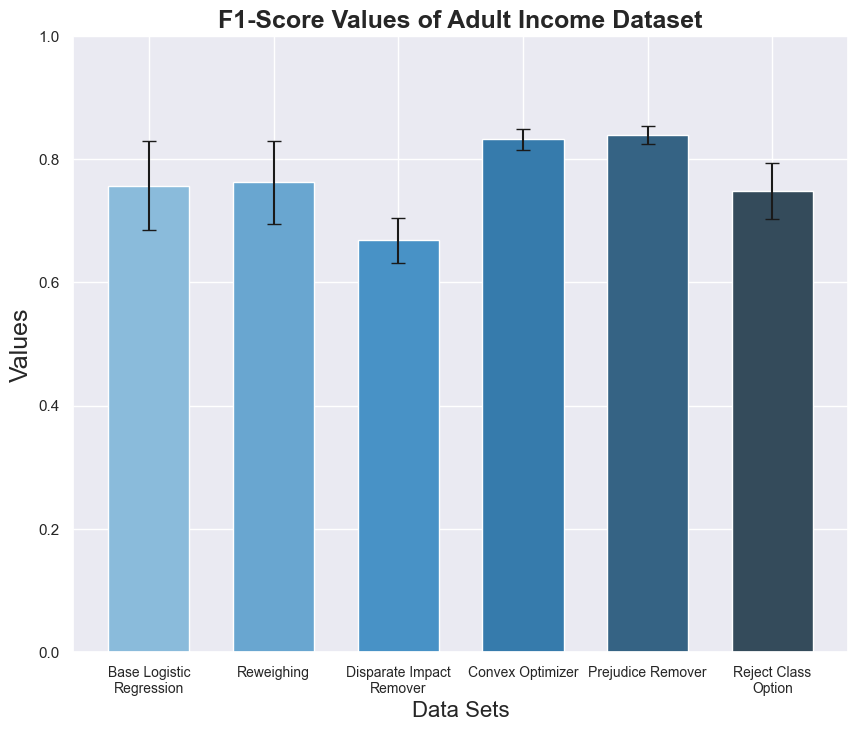

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"]  
df_method = df[df['Data_Name'] == "German"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['F1-Score'].std()) 

# Definir a largura das barras
largura_barra = 0.65

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color = cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('F1-Score Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 1)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//germanf1.png")


<Figure size 640x480 with 0 Axes>

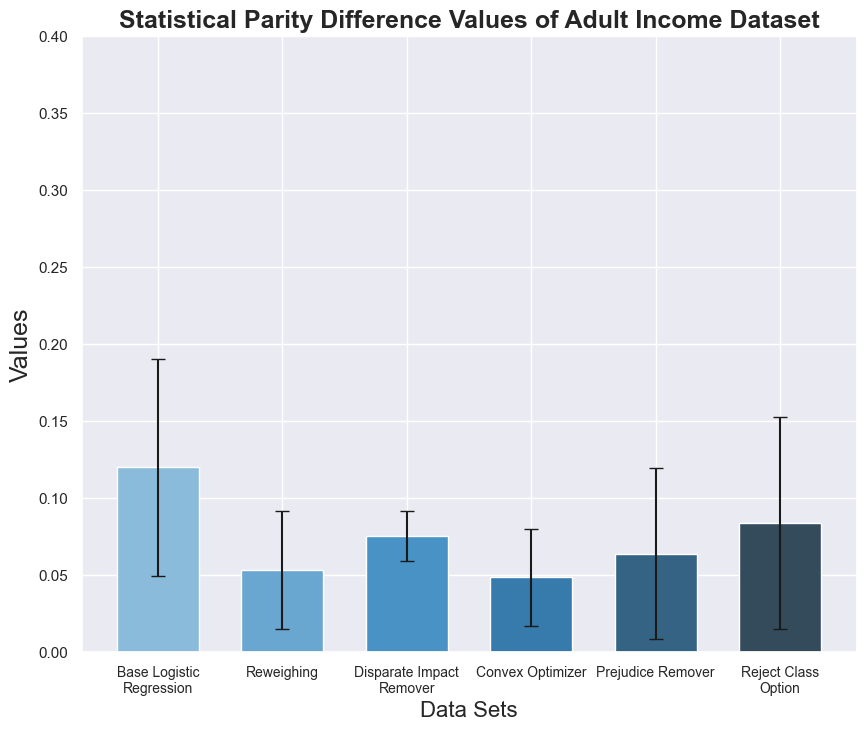

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"] 

df_method = df[df['Data_Name'] == "German"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].std()) 

# Definir a largura das barras
largura_barra = 0.66

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color=cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('Statistical Parity Difference Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 0.4)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//germanspd.png")


<Figure size 640x480 with 0 Axes>

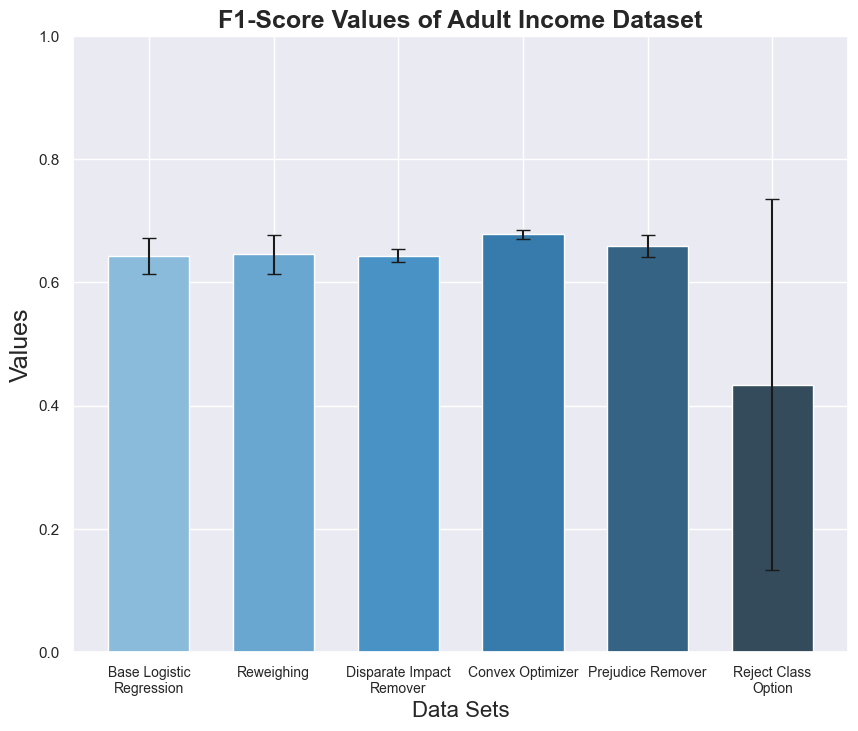

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"]  
df_method = df[df['Data_Name'] == "Compas"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['F1-Score'].std()) 

# Definir a largura das barras
largura_barra = 0.65

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color = cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('F1-Score Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 1)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//compasf1.png")


<Figure size 640x480 with 0 Axes>

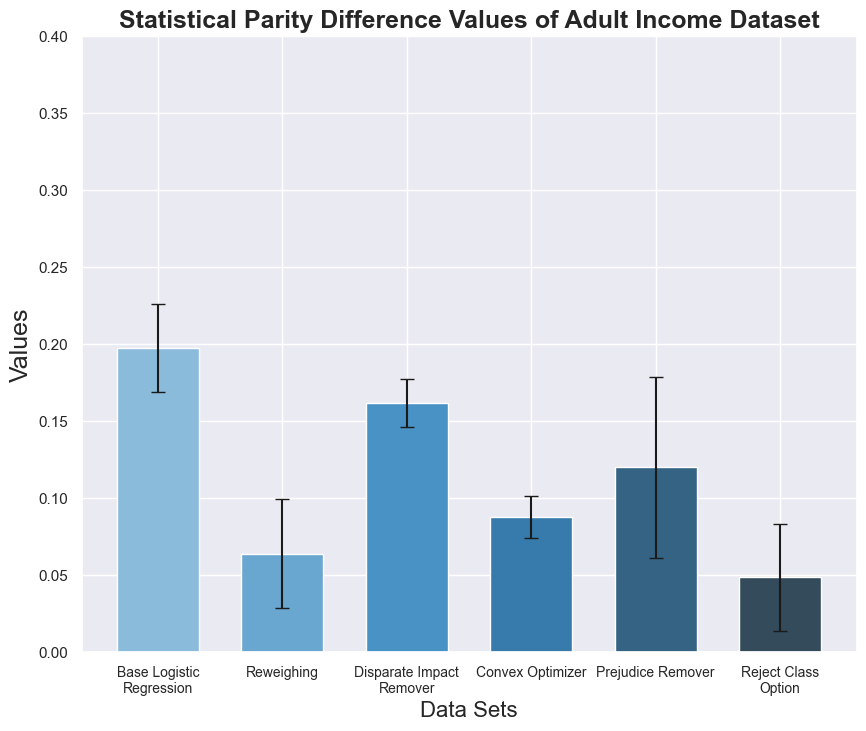

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
names_method = ["Base Logistic\nRegression", "Reweighing",
                "Disparate Impact\nRemover", "Convex Optimizer",
                "Prejudice Remover", "Reject Class\nOption"] 

df_method = df[df['Data_Name'] == "Compas"]

metrica1 = []
dp1 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].mean())  
    dp1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].std()) 

# Definir a largura das barras
largura_barra = 0.66

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

sns.set(style="darkgrid")
sns.despine()

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

# Iterar sobre cada barra e atribuir uma cor
for i in range(len(categorias)):
    barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color=cores[i])

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1)
ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
ax.set_xlabel('Data Sets', fontsize=16)
ax.set_ylabel('Values', fontsize=18)
ax.set_title('Statistical Parity Difference Values of Adult Income Dataset', fontsize=18, fontweight='bold')
ax.set_ylim(0, 0.4)

# Adicionar legenda
#ax.legend()

# Mostrar o gráfico
plt.show()

fig.savefig(".//plots//compasspd.png")


In [99]:
def plotF1(data_name):
    # Dados de exemplo
    categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
    names_method = ["Base Logistic\nRegression", "Reweighing",
                    "Disparate Impact\nRemover", "Convex\nOptimizer",
                    "Prejudice Remover", "Reject Class\nOption"]  
    df_method = df[df['Data_Name'] == data_name]

    metrica1 = []
    dp1 = []

    for name in categorias:
        metrica1.append(df_method.loc[df['Method'] == name]['F1-Score'].mean())  
        dp1.append(df_method.loc[df['Method'] == name]['F1-Score'].std()) 

    # Definir a largura das barras
    largura_barra = 0.66

    # Definir a posição das barras no eixo x
    posicao_metrica1 = np.arange(len(categorias))
    posicao_metrica2 = posicao_metrica1 + largura_barra

    sns.set(style="darkgrid")
    sns.despine()

    # Criar o gráfico de barras
    fig, ax = plt.subplots(figsize=(9, 6))

    cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

    # Iterar sobre cada barra e atribuir uma cor
    for i in range(len(categorias)):
        barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color = cores[i])

    # Configurar os rótulos do eixo x e o título do gráfico
    ax.set_xticks(posicao_metrica1)
    ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
    ax.set_xlabel('Methods', fontsize=16)
    ax.set_ylabel('F1 Score', fontsize=16)
    title = "Utility Metric for " + data_name + " Dataset"
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_ylim(0, 1)

    # Adicionar legenda
    #ax.legend()

    # Mostrar o gráfico
    plt.show()

    fig.savefig(".//plots//" + data_name + "F1.png")

def plotSPD(data_name):
    # Dados de exemplo
    categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
    names_method = ["Base Logistic\nRegression", "Reweighing",
                    "Disparate Impact\nRemover", "Convex\nOptimizer",
                    "Prejudice Remover", "Reject Class\nOption"] 

    df_method = df[df['Data_Name'] == data_name]

    metrica1 = []
    dp1 = []

    for name in categorias:
        metrica1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].mean())  
        dp1.append(df_method.loc[df['Method'] == name]['Statistical Parity'].std()) 

    # Definir a largura das barras
    largura_barra = 0.66

    # Definir a posição das barras no eixo x
    posicao_metrica1 = np.arange(len(categorias))
    posicao_metrica2 = posicao_metrica1 + largura_barra

    sns.set(style="darkgrid")
    sns.despine()

    # Criar o gráfico de barras
    fig, ax = plt.subplots(figsize=(9, 6))

    cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

    # Iterar sobre cada barra e atribuir uma cor
    for i in range(len(categorias)):
        barra = ax.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=5, color=cores[i])

    # Configurar os rótulos do eixo x e o título do gráfico
    ax.set_xticks(posicao_metrica1)
    ax.set_xticklabels(names_method, horizontalalignment='center', fontsize=10)
    ax.set_xlabel('Methods', fontsize=16)
    ax.set_ylabel('Statistical Parity Difference', fontsize=16)
    title = "Fairness Metric for " + data_name + " Dataset"
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.4)

    # Adicionar legenda
    #ax.legend()

    # Mostrar o gráfico
    plt.show()

    fig.savefig(".//plots//" + data_name + "SPD.png")

<Figure size 640x480 with 0 Axes>

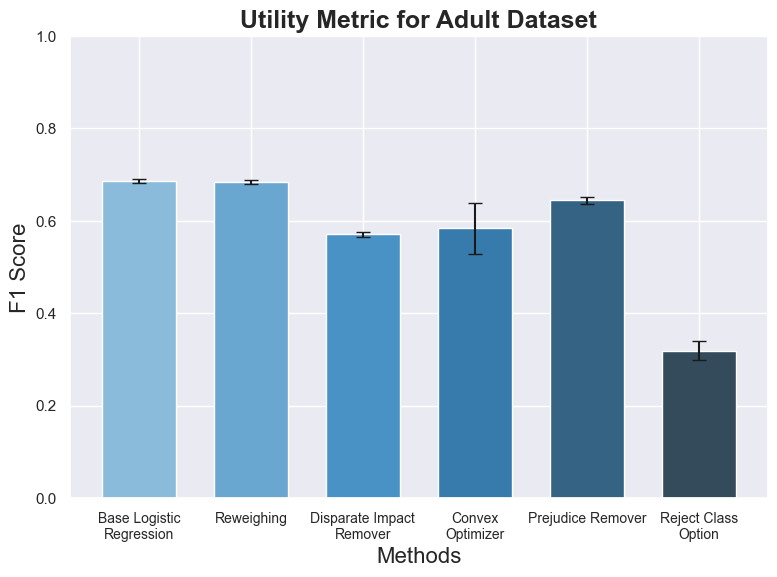

<Figure size 640x480 with 0 Axes>

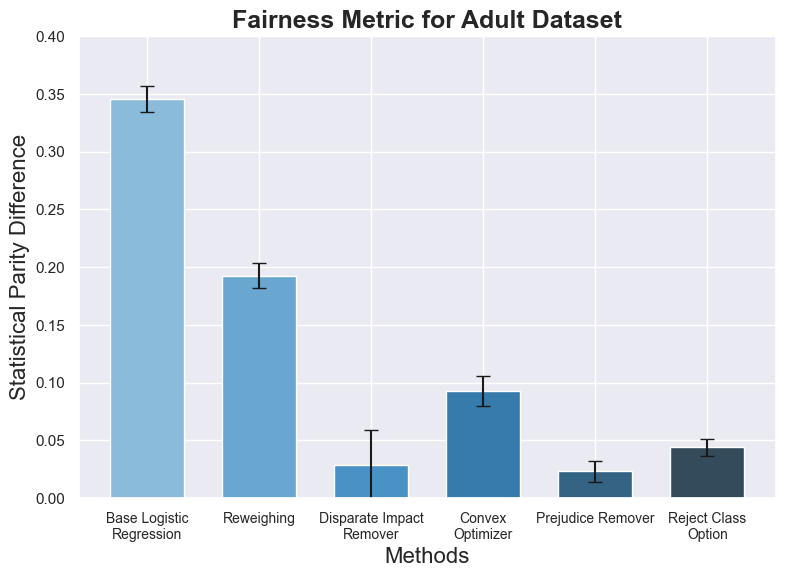

<Figure size 640x480 with 0 Axes>

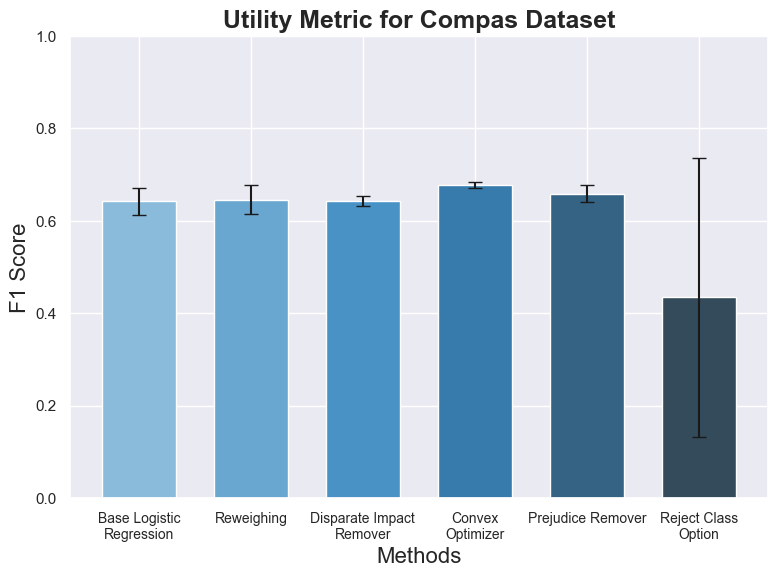

<Figure size 640x480 with 0 Axes>

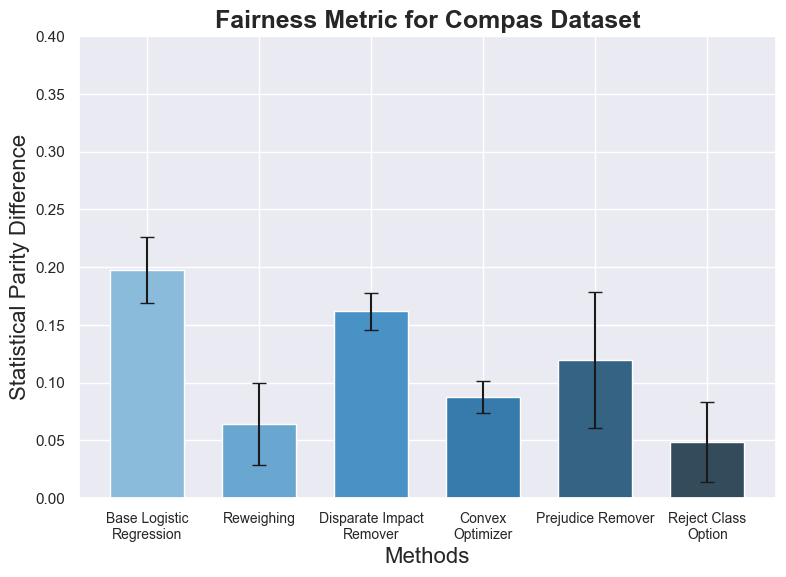

<Figure size 640x480 with 0 Axes>

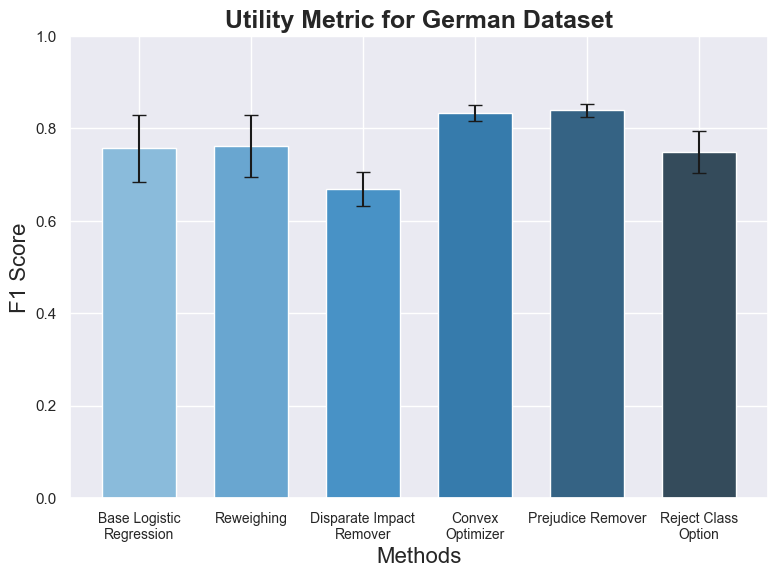

<Figure size 640x480 with 0 Axes>

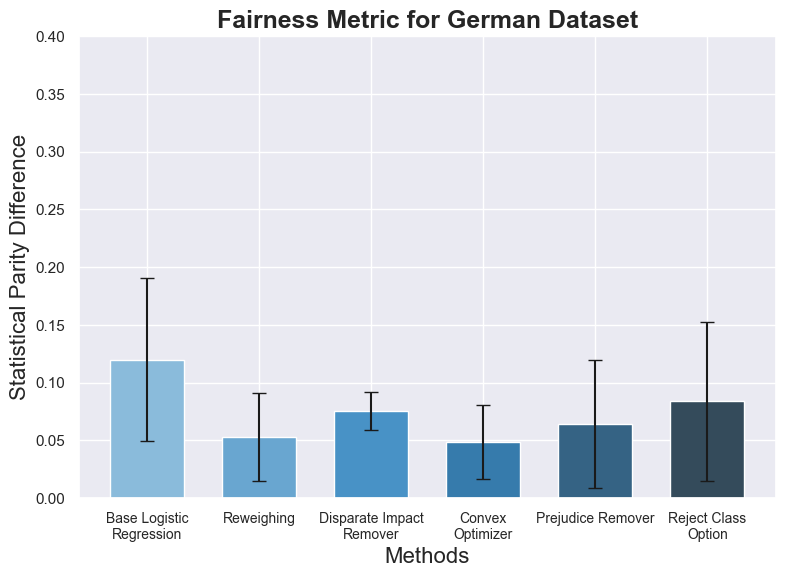

In [100]:
plotF1("Adult")
plotSPD("Adult")

plotF1("Compas")
plotSPD("Compas")

plotF1("German")
plotSPD("German")